# Exploratory analysis

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

## Read the files

In [51]:
col_names_user = ['user-mboxsha1', 'gender', 'age', 'country', 'signup']
df_user = pd.read_csv('../data/usersha1-profile.tsv', sep='\t', names=col_names_user)
df_user.head()

,user-mboxsha1,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [52]:
col_names_consumption = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']

df_consumption = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=col_names)
df_consumption.head()

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [54]:
df_user.isna().sum()

user-mboxsha1        0
gender           32775
age              74900
country              0
signup               0
dtype: int64

## Users

In [68]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359347 entries, 0 to 359346
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user-mboxsha1  359347 non-null  object 
 1   gender         326572 non-null  object 
 2   age            284447 non-null  float64
 3   country        359347 non-null  object 
 4   signup         359347 non-null  object 
dtypes: float64(1), object(4)
memory usage: 13.7+ MB


### Age

In [67]:
df_user.describe()

,age
count,284447.000000
mean,25.098046
std,21.665742
min,-1337.000000
25%,20.000000
50%,23.000000
75%,28.000000
max,1002.000000


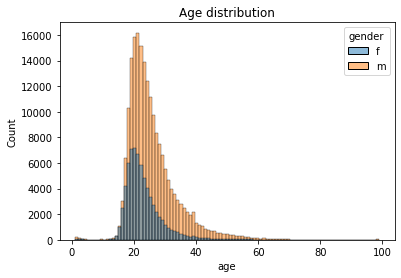

In [134]:
plt.figure(figsize=(6,4)) 
sns.histplot(data=df_user[df_user.age.isin(np.arange(0,100))], x="age", bins=99, hue="gender", )
plt.title("Age distribution")
plt.savefig("../figures/age_distribution.pdf", bbox_inches="tight")
plt.show()

In [59]:
(df_user.age < 5).sum()

936

In [31]:
(df_user.age > 100).sum()

1081

### Country

In [43]:
df_user.country.value_counts()

United States         67044
Germany               31651
United Kingdom        29902
Poland                20987
Russian Federation    19833
                      ...  
French Guiana             4
Liberia                   3
Benin                     3
Palau                     3
Gambia                    3
Name: country, Length: 239, dtype: int64

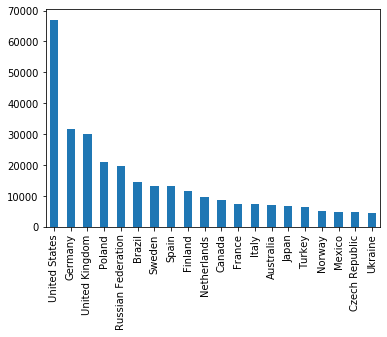

In [64]:
df_user.country.value_counts()[:20].plot(kind="bar")
plt.show()

### Gender

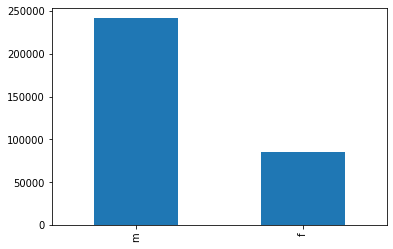

In [71]:
df_user.gender.value_counts().plot(kind="bar")
plt.show()

### User-mboxsha1

In [77]:
print(len(df_user["user-mboxsha1"]))
df_user["user-mboxsha1"].nunique()

359347


359347

## Consumption

In [70]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535655 entries, 0 to 17535654
Data columns (total 4 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   user-mboxsha1          object
 1   musicbrainz-artist-id  object
 2   artist-name            object
 3   plays                  int64 
dtypes: int64(1), object(3)
memory usage: 535.1+ MB


### Plays

In [69]:
df_consumption.describe()

,plays
count,1.753566e+07
mean,2.151932e+02
std,6.144815e+02
min,0.000000e+00
25%,3.500000e+01
50%,9.400000e+01
75%,2.240000e+02
max,4.191570e+05


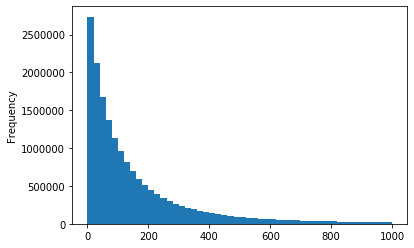

In [83]:
df_consumption.plays[df_consumption.plays < 10000].plot(kind="hist", bins=50)
plt.show()

In [88]:
(df_consumption.plays > 100000).sum()

46

### Artist-name

In [95]:
df_consumption["artist-name"].nunique()

292363

In [110]:
df_consumption[df_consumption.plays > 60000]

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays
27358,006261139d787c1e43b4c69d304f2772367c1005,f9ef7a22-4262-4596-a2a8-1d19345b8e50,garbage,62054
43276,00a20b9791abd8b29903a8a43e343ae93a98d9fd,ac9a487a-d9d2-4f27-bb23-0f4686488345,lil wayne,107758
191656,02ccf45baa7fe62f0935b8a6a64ff8869a7b0387,b202beb7-99bd-47e7-8b72-195c8d72ebdd,christina aguilera,135392
556800,082279c9db5330c25a4e0ceae275a9fc79c753c4,847e8a0c-cc20-4213-9e16-975515c2a926,céline dion,86132
634605,09490bb4034066761d59985dbe93e0119fcc1006,39ab1aed-75e0-4140-bd47-540276886b60,oasis,74522
...,...,...,...,...
17071986,f929ec83f45ed176dda7c98ffa576fd3a9cc862a,197450cd-0124-4164-b723-3c22dd16494d,frank sinatra,67910
17106848,f9b1fbe1c54551d835bed048474652f77c6f6bc4,f4a31f0a-51dd-4fa7-986d-3095c40c5ed9,evanescence,62164
17206853,fb30d581e1ddf82812e7bdfae7a7d965a6cf54bc,5dfdca28-9ddc-4853-933c-8bc97d87beec,marilyn manson,110098
17305207,fca2614e3834feb94726f6334b4948d776a767a1,39ab1aed-75e0-4140-bd47-540276886b60,oasis,60618


In [112]:
grouped = df[['artist-name', 'plays']].groupby('artist-name').sum()
grouped = grouped.sort_values(by='plays', ascending=False)
grouped

,plays
artist-name,
the beatles,30466827
radiohead,27426234
coldplay,16686772
pink floyd,15943557
metallica,15481852
...,...
alex m.o.r.p.h.|rank 1,1
el tigre lupercio,1
alex m.o.r.p.h. vs eric prydz,1


### Musicbrainz-artist-id

In [96]:
df_consumption["artist-name"].nunique()

292363

### user-mboxsha1

In [97]:
df_consumption["user-mboxsha1"].nunique()

358868